<div style="color:white;display:fill;border-radius:2px;background-color:#065222;font-size:32px;font-family:Nexa;letter-spacing:0.5px">
        <p style="padding: 10px;color:#f2f2f2;"><b>ML For Credit Card Fraud Detection</b></p>
</div>
<h3>Here we will build a predictive algorithm to detect a fraudulent transaction using 'creditcard.csv' dataset.

 <center><img src="Card_transactions.png" width="600" height="300" ></center> 

<a id="link0"></a>
<div style="color:white;display:fill;border-radius:2px;background-color:#141e66;font-size:32px;font-family:Nexa;letter-spacing:0.5px">
        <p style="padding: 10px;color:#f2f2f2;"><b>Table of Contents</b></p>
</div>

<!-- 1) <a rel="noopener" target="_self" href="#link1">About Data Set</a> -->
1) <a target="_self" href="#link1">About Data Set</a>
2) <a target="_self" href="#link2">Import Packages</a>
3) <a target="_self" href="#link3">Data Loading and Description</a>
4) <a target="_self" href="#link4">Data Exploring</a>
5) <a target="_self" href="#link5">Feature Selection</a>
6) <a target="_self" href="#link6">Model Train </a>
7) <a target="_self" href="#link7">Model Selections/Evaluation </a>
8) <a target="_self" href="#link8">Conclusions</a>

<a target="_self" href="#link0" id="link1" style="color:green;font-weight:700;font-size:20px;">1) About Dataset:</a><br>
<p>The dataset contains credit card transactions made by European cardholders in September 2013. It comprises two days' worth of transactions, totaling 284,807 entries. Out of these transactions, only 492 are fraudulent, making the dataset highly unbalanced. The positive class (frauds) represents only 0.172% of all transactions.</p>

The dataset provides numerical input variables obtained through PCA transformation. The features V1 to V28 are principal components, while 'Time' and 'Amount' are the only features not transformed. 'Time' represents the seconds elapsed between each transaction and the first transaction in the dataset, and 'Amount' represents the transaction amoun
<br><span style="color:#8c1482;font-weight:500;font-size:18px;">Content</span><br>
This data was downloaded from info... https://www.kaggle.com/mlg-ulb/creditcardfraud

<a target="_self" href="#link0" id="link2" style="color:green;font-weight:700;font-size:20px;">2) Import Packages:</a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
sns.set(font_scale=1.5)
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format

<a target="_self" href="#link0" id="link3" style="color:green;font-weight:700;font-size:20px;">3) Data Loading and Description:</a>

In [2]:
# Selecting only 1% of the legit transaction data from whole data to for sample
df_input = pd.read_csv('creditcard.csv')
legit = df_input[df_input['Class'] == 0].sample(n=3000, random_state =42)
fraud = df_input[df_input['Class'] == 1]
df = pd.concat([legit, fraud], ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3492 non-null   float64
 1   V1      3492 non-null   float64
 2   V2      3492 non-null   float64
 3   V3      3492 non-null   float64
 4   V4      3492 non-null   float64
 5   V5      3492 non-null   float64
 6   V6      3492 non-null   float64
 7   V7      3492 non-null   float64
 8   V8      3492 non-null   float64
 9   V9      3492 non-null   float64
 10  V10     3492 non-null   float64
 11  V11     3492 non-null   float64
 12  V12     3492 non-null   float64
 13  V13     3492 non-null   float64
 14  V14     3492 non-null   float64
 15  V15     3492 non-null   float64
 16  V16     3492 non-null   float64
 17  V17     3492 non-null   float64
 18  V18     3492 non-null   float64
 19  V19     3492 non-null   float64
 20  V20     3492 non-null   float64
 21  V21     3492 non-null   float64
 22  

<a target="_self" href="#link0" id="link4" style="color:green;font-weight:700;font-size:20px;">4) Data Exploring:</a>

In [4]:
# Cheking missing values in columns
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

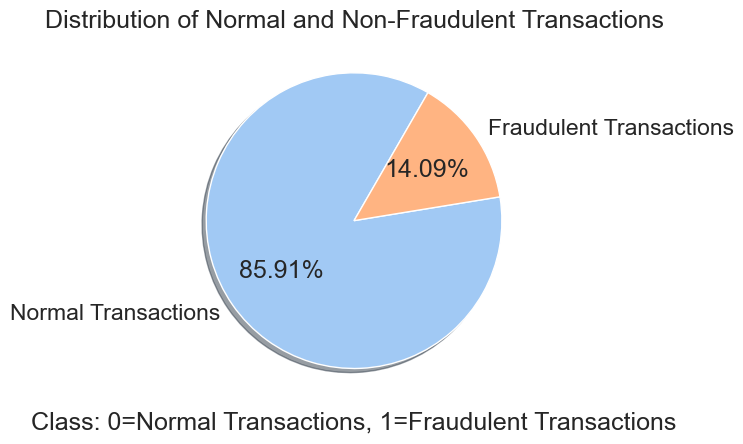

In [5]:
#Pie Chart
fraud= (df['Class'].value_counts(normalize=True)).loc[1]
# fraudulent_percentage = (df['Class'].value_counts(normalize=True) * 100).loc[1]
non_fraud = (df['Class'].value_counts(normalize=True)).loc[0]
# non_fraudulent_percentage = (df['Class'].value_counts(normalize=True) * 100).loc[0]

# Declaring data 
values=[non_fraud,fraud]
labels=['Normal Transactions','Fraudulent Transactions']
palette_color = sns.color_palette('pastel') 
# plotting data on chart 
plt.pie(values, labels=labels, colors=palette_color, autopct='%.2f%%', shadow=True, startangle=60)
plt.title("Distribution of Normal and Non-Fraudulent Transactions")
plt.xlabel('Class: 0=Normal Transactions, 1=Fraudulent Transactions')
  
# displaying chart 
plt.show() 

In [6]:
# Transactions Stats
# Class: 0=Normal Transactions, 1=Fraudulent Transactions
stats=df.groupby('Class')['Amount'].agg(['mean', 'median', 'min', 'max'])
# stats=df.groupby('Class')['Amount'].agg(['mean', 'median', 'min', 'max']).reset_index()
# ststs['Class']=stats['Class'].replace(['0','1'],['01','11'])
# ststs['Class']=stats['Class'].replace({0: 10, 1: 100})
stats
# df['column name'] = df['column name'].replace(['1st old value', '2nd old value', ...], 'new value')

,mean,median,min,max
Class,,,,
0,85.6929,21.7450,0.0000,4000.0000
1,122.2113,9.2500,0.0000,2125.8700


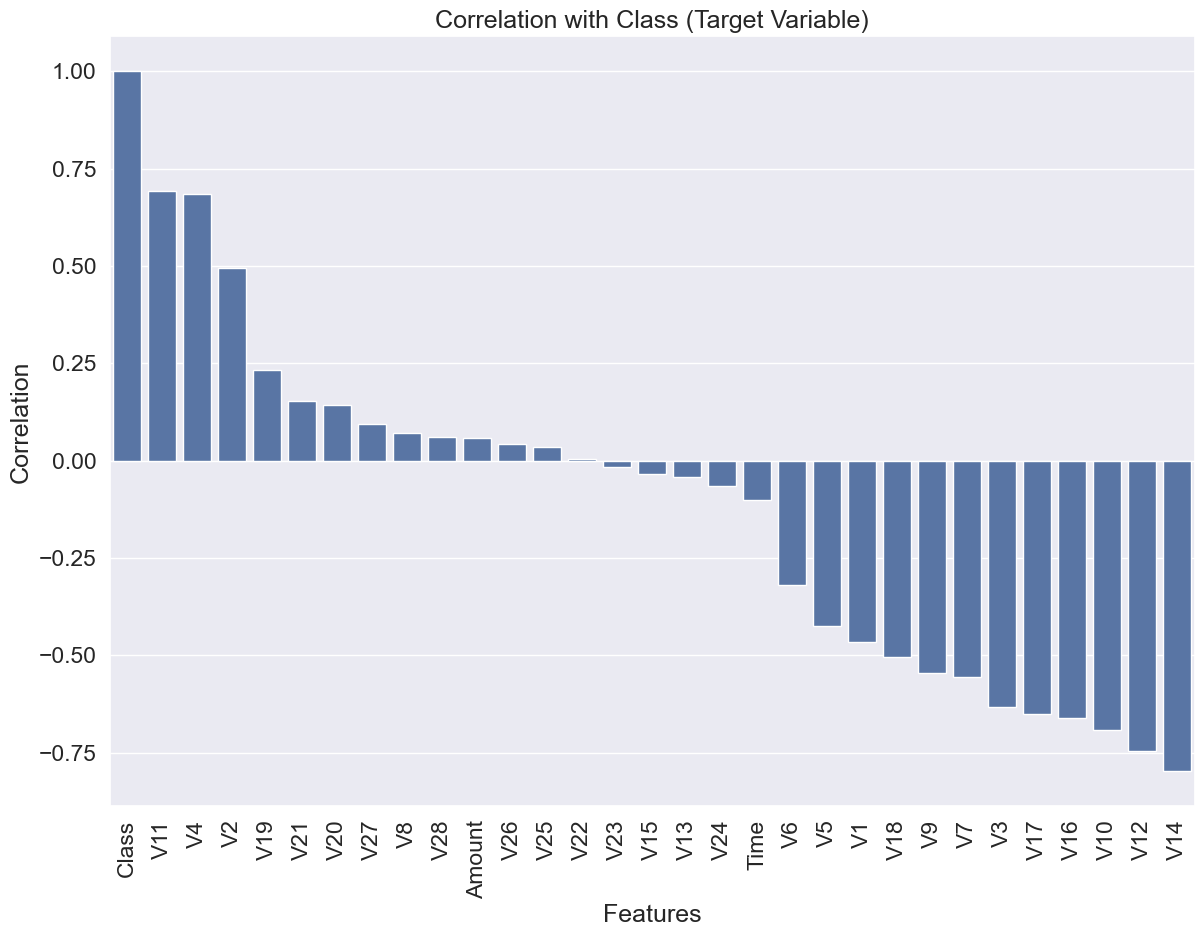

In [7]:
# Calculate the correlation between all columns and the 'Class' column
correlation_with_class = df.corr()['Class'].sort_values(ascending=False)

# Plot the correlation as a bar plot
plt.figure(figsize=(14, 10))
sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values)
plt.xticks(rotation=90)
plt.title('Correlation with Class (Target Variable)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

<a target="_self" href="#link0" id="link5" style="color:green;font-weight:700;font-size:20px;">5) Feature Selection:</a>

In [8]:
# Do PCA Before this step???
df = df.drop(['Amount','Time'], axis=1)
# df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.3145,0.5906,-0.6666,0.7166,0.3020,-1.1255,0.3889,-0.2884,-0.1321,-0.5977,...,-0.0580,-0.1703,-0.4297,-0.1413,-0.2002,0.6395,0.3995,-0.0343,0.0317,0
1,-0.7987,1.1851,0.9045,0.6946,0.2190,-0.3193,0.4952,0.1393,-0.7602,0.1705,...,-0.0813,0.2023,0.5787,-0.0922,0.0137,-0.2465,-0.3801,-0.3960,-0.1129,0
2,-0.3911,-0.2455,1.1221,-1.3087,-0.6399,0.0087,-0.7013,-0.0273,-2.6289,2.0513,...,0.0657,-0.1335,0.1174,-0.1917,-0.4886,-0.3098,0.0081,0.1637,0.2396,0
3,-0.0603,1.0651,-0.9874,-0.0296,0.1764,-1.3485,0.7756,0.1348,-0.1497,-1.2386,...,-0.1697,0.3556,0.9076,-0.0185,-0.1263,-0.3399,-0.1503,-0.0236,0.0423,0
4,1.8484,0.3734,0.2693,3.8664,0.0881,0.9704,-0.7219,0.2360,0.6835,1.1663,...,-0.2828,0.1036,0.6210,0.1971,0.6924,-0.2065,-0.0213,-0.0198,-0.0427,0


<a target="_self" href="#link0" id="link6" style="color:green;font-weight:700;font-size:20px;">6) Model Train:</a>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Putting feature variables into X
X = df.drop(['Class'], axis=1)
# Putting target variable to y
y = df['Class']
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [10]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
1204,-4.6242,-2.9094,1.6671,0.3295,-1.3666,0.5174,1.1465,-1.3681,0.8742,2.6367,...,1.4179,-2.7159,-1.3635,-0.3848,0.8512,0.6146,0.1312,0.5729,-2.5535,1.9324
940,0.0674,1.2510,-1.1614,-0.2178,0.7059,-1.0479,0.6499,0.1398,-0.2241,-1.2195,...,0.0536,-0.2011,0.2950,0.8694,-0.2253,-0.7259,-0.2459,-0.1127,-0.0010,0.0342
1228,-0.1170,0.8218,-1.0816,-1.3232,1.5853,-0.7410,1.4782,-0.1547,-0.4922,-0.3003,...,0.2696,-0.0334,0.2736,0.8332,-0.2075,0.2438,-0.2978,0.0708,0.3737,0.2614
1402,-1.5370,-0.0414,0.6298,-0.6870,0.7961,-0.4858,-0.3027,0.7374,-0.0691,-0.6347,...,0.4989,0.1347,-0.1080,-0.7012,-0.1845,-0.8516,-0.1295,0.3455,0.1785,-0.0542
547,-0.3352,0.4829,0.7430,-0.5771,0.6078,-0.4609,1.1105,-0.7376,0.7580,0.0528,...,-0.4527,-0.2393,0.0253,0.6522,0.1331,1.1230,-0.3064,-0.5600,-0.6959,-0.4968


In [11]:
y_train.head()

1204    0
940     0
1228    0
1402    0
547     0
Name: Class, dtype: int64

### Handling Imbalanced Data

In [12]:
import imblearn
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=0.5, random_state = 42)
X_train,y_train = over.fit_resample(X_train, y_train)

y_train.value_counts()

Class
0    2390
1    1195
Name: count, dtype: int64

<a target="_self" href="#link0" id="link7" style="color:green;font-weight:700;font-size:20px;">7) Model Selections/Evaluation:</a><br/>

In [13]:
# Simple ML models
# from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [14]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svc': {
        'model': svm.SVC(gamma='auto'),
        'params' : {'C': [0.1, 1], 'kernel': ['linear', 'rbf']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {'n_estimators': [50, 100] , 'max_depth': [None, 10, 20]
        }
    },
    'dtree_model' : {
        'model': DecisionTreeClassifier(),
        'params': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20]
        }
    },
    'knn_model' : {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {'C': [0.001, 0.01, 0.1, 1]
        }
    }
}

In [15]:
scores = []

for model_name, mp in model_params.items():
    # clf =  GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1, scoring='roc_auc',return_train_score=False)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1, scoring='average_precision',return_train_score=False)
    # clf =  GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1, scoring='accuracy',return_train_score=False)
    # clf =  GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1, scoring='f1',return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        # 'accuracy_score': accuracy_score(y_test, pred_y)
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [16]:
print('n=3000, 1% of Data Scores (With SMOTE and amount column) (No Time & Amount Column)')
# best_score_roc_auc
df

n=3000, 1% of Data Scores (With SMOTE and amount column) (No Time & Amount Column)


,model,best_score,best_params
0,svc,0.9832,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.9935,"{'max_depth': 20, 'n_estimators': 100}"
2,dtree_model,0.9255,"{'criterion': 'gini', 'max_depth': 10}"
3,knn_model,0.9888,"{'n_neighbors': 7, 'weights': 'distance'}"
4,logistic_regression,0.9807,{'C': 1}


In [17]:
print('n=3000, 1% of Data Scores (With SMOTE and amount column) (No Time & Amount Column)')
# best_score_roc_auc
df

n=3000, 1% of Data Scores (With SMOTE and amount column) (No Time & Amount Column)


,model,best_score,best_params
0,svc,0.9832,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.9935,"{'max_depth': 20, 'n_estimators': 100}"
2,dtree_model,0.9255,"{'criterion': 'gini', 'max_depth': 10}"
3,knn_model,0.9888,"{'n_neighbors': 7, 'weights': 'distance'}"
4,logistic_regression,0.9807,{'C': 1}


<a target="_self" href="#link0" id="link8" style="color:green;font-weight:700;font-size:20px;">8) Conclusions:</a>

In [18]:
# Model EValuation and Plotting

In [20]:
# If you have GridSearchCV object:

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc,confusion_matrix

clf_f = GridSearchCV( RandomForestClassifier(),
                     {'n_estimators': [50, 100] ,'max_depth': [None, 10, 20]}, 
                      cv=5, n_jobs=-1, scoring='average_precision',return_train_score=False)

clf_f.fit(X_train, y_train)

y_pred_prob = clf_f.predict_proba(X_test)[:, 1]
# y_pred = model.predict(X_test)
pred_y = clf_f.predict(X_test)

# Classification Report
print ("Classification Report: ")
print (classification_report(y_test,clf.best_estimator_.predict(X_test)))

# Accuracy Score
print ("Accuracy Score: ", accuracy_score(y_test, pred_y))
# print ("Best Params: ", clf.best_params_(y_test, pred_y))

# AUROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# AUROC Score
auroc = roc_auc_score(y_test, y_pred_prob)
print(f"AUROC Score: {auroc:.4f}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       610
           1       0.96      0.85      0.90        89

    accuracy                           0.98       699
   macro avg       0.97      0.92      0.95       699
weighted avg       0.98      0.98      0.98       699

Accuracy Score:  0.977110157367668
AUROC Score: 0.9729


Random Forest Classifier:


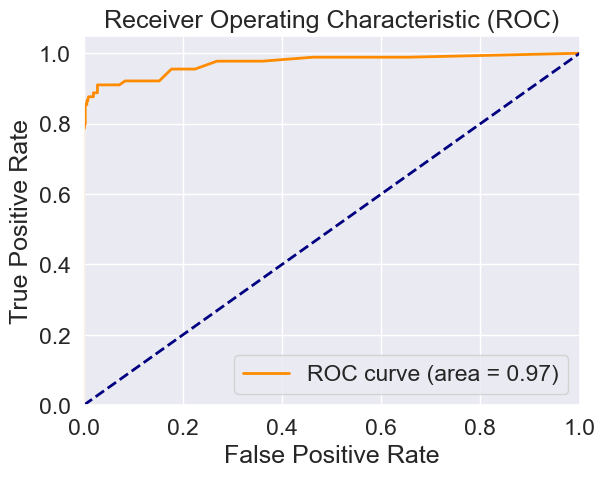

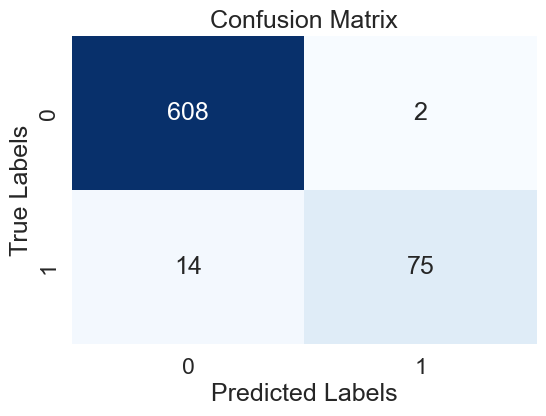

In [21]:
    print("Random Forest Classifier:")
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Display the confusion matrix
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()